In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
cd ../data

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


In [3]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [4]:
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)


X_train_estimated_a.drop('date_calc', axis=1, inplace=True)
X_test_estimated_a.drop('date_calc', axis=1, inplace=True)

X_train_estimated_b.drop('date_calc', axis=1, inplace=True)
X_test_estimated_b.drop('date_calc', axis=1, inplace=True)

X_train_estimated_c.drop('date_calc', axis=1, inplace=True)
X_test_estimated_c.drop('date_calc', axis=1, inplace=True)


train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

In [5]:
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)


X_train_estimated_a = X_train_estimated_a.loc[intersection_index_estimated_a]
X_train_estimated_b = X_train_estimated_b.loc[intersection_index_estimated_b]
X_train_estimated_c = X_train_estimated_c.loc[intersection_index_estimated_c]


X_train_observed_a = X_train_observed_a.loc[intersection_index_observed_a]
X_train_observed_b = X_train_observed_b.loc[intersection_index_observed_b]
X_train_observed_c = X_train_observed_c.loc[intersection_index_observed_c]


train_a_estimated = train_a.loc[intersection_index_estimated_a]
train_b_estimated = train_b.loc[intersection_index_estimated_b]
train_c_estimated = train_c.loc[intersection_index_estimated_c]

train_a_observed = train_a.loc[intersection_index_observed_a]
train_b_observed = train_b.loc[intersection_index_observed_b]
train_c_observed = train_c.loc[intersection_index_observed_c]

In [6]:
B19 = train_b.loc['2019-6-1':'2019-6-2'].index

b20_1 = train_b.loc['2020-4-2':'2020-4-15'].index
b20_2 = train_b.loc['2020-7-13':'2020-8-25'].index
B20 = b20_1.union(b20_2)

b21_1 = train_b.loc['2021-2-18':'2021-4-18'].index
b21_2 = train_b.loc['2021-4-30':'2021-5-1'].index
b21_3 = train_b.loc['2021-6-5':'2021-6-6'].index
b21_4 = train_b.loc['2021-6-13':'2021-6-13'].index
b21_5 = train_b.loc['2021-6-23':'2021-6-23'].index
b21_6 = train_b.loc['2021-7-4':'2021-7-5'].index
b21_7 = train_b.loc['2021-8-26':'2021-9-3'].index
b21_8 = train_b.loc['2021-9-10':'2021-9-13'].index
b21_9 = train_b.loc['2021-9-21':'2021-9-26'].index
B21 = b21_1.union(b21_2).union(b21_3).union(b21_4).union(b21_5).union(b21_6).union(b21_7).union(b21_8).union(b21_9)

B22 = train_b.loc['2022-3-20':'2022-4-4'].index

B_index_drop = B19.union(B20).union(B21).union(B22)

train_b = train_b[train_b.index.isin(B_index_drop)==False]

#We match the sizes of X and Y
#We keep the measurements from every hour only
new_index_b = train_b.index

intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)

X_train_estimated_b = X_train_estimated_b.loc[new_index_b.intersection(X_train_estimated_b.index)]
X_train_observed_b = X_train_observed_b.loc[new_index_b.intersection(X_train_observed_b.index)]

train_b_estimated = train_b.loc[X_train_estimated_b.index]
train_b_observed = train_b.loc[X_train_observed_b.index]

In [7]:
X_train_observed_a = pd.concat([X_train_observed_a, train_a_observed], axis = 1)
X_train_estimated_a = pd.concat([X_train_estimated_a, train_a_estimated], axis = 1)

X_train_observed_b = pd.concat([X_train_observed_b, train_b_observed], axis = 1)
X_train_estimated_b = pd.concat([X_train_estimated_b, train_b_estimated], axis = 1)

X_train_observed_c = pd.concat([X_train_observed_c, train_c_observed], axis = 1)
X_train_estimated_c = pd.concat([X_train_estimated_c, train_c_estimated], axis = 1)

In [8]:
X_train_a = pd.concat([X_train_observed_a, X_train_estimated_a], axis = 0)
X_train_b = pd.concat([X_train_observed_b, X_train_estimated_b], axis = 0)
X_train_c = pd.concat([X_train_observed_c, X_train_estimated_c], axis = 0)

Which threshold for station A, B and C?

Text(0.5, 1.0, 'C, threshold=-5')

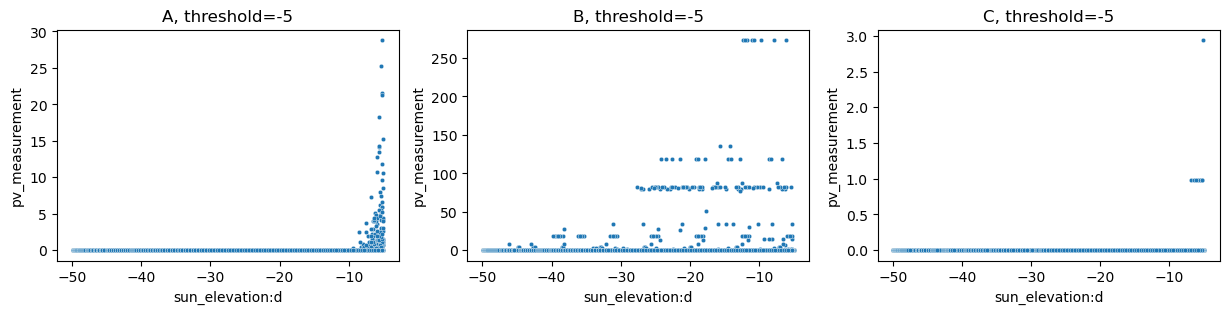

In [9]:
t_1, t_2, t_3 = -5, -5, -5
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
axes = axes.flatten()

sns.scatterplot(data=X_train_a[X_train_a['sun_elevation:d']< t_1], x='sun_elevation:d',y='pv_measurement', ax=axes[0], s=10)
axes[0].set_title(f"A, threshold={t_1}")

sns.scatterplot(data=X_train_b[X_train_b['sun_elevation:d']< t_2], x='sun_elevation:d',y='pv_measurement', ax=axes[1], s=10)
axes[1].set_title(f"B, threshold={t_2}")

sns.scatterplot(data=X_train_c[X_train_c['sun_elevation:d']< t_3], x='sun_elevation:d',y='pv_measurement', ax=axes[2], s=10)
axes[2].set_title(f"C, threshold={t_3}")

In [10]:
i = X_train_b[(X_train_b['sun_elevation:d']< -5) & (X_train_b['pv_measurement'] >30)].index

In [11]:
X_train_b.drop(X_train_b[(X_train_b['sun_elevation:d']< -5) & (X_train_b['pv_measurement'] >30)].index)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
2019-01-01 00:00:00,5.6,1.239,1226.400024,0.000000,0.0,1226.400024,0.0,275.399994,0.0,0.000000,0.0,0.000000,69.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.400024,0.00,0.0,974.500000,980.599976,0.0,0.0,89.199997,986.599976,NaN,0.0,0.0,-0.0,0.0,12.985000,-49.139999,0.0,278.399994,73.900002,19275.900391,2.5,1.1,2.2,-0.0,0.000000
2019-01-01 01:00:00,5.4,1.241,1157.599976,0.000000,0.0,1157.599976,0.0,274.700012,0.0,0.000000,0.0,0.000000,98.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.299988,0.05,1.0,973.400024,979.500000,0.0,0.0,88.900002,985.599976,NaN,0.0,0.0,-0.0,0.1,33.275002,-46.497002,0.0,278.000000,99.400002,12777.299805,3.4,1.3,3.1,-0.0,0.000000
2019-01-01 02:00:00,5.5,1.238,1087.599976,0.000000,0.0,1087.599976,0.0,275.000000,0.0,0.000000,0.0,0.000000,96.300003,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,985.900024,0.00,0.0,973.000000,979.000000,0.0,0.0,87.599998,985.099976,NaN,0.0,0.0,-0.0,0.1,51.573002,-41.963001,0.0,278.200012,98.400002,12776.700195,3.8,2.0,3.3,-0.0,0.000000
2019-01-01 03:00:00,5.3,1.240,1016.400024,0.000000,0.0,1016.400024,0.0,274.500000,0.0,0.000000,0.0,0.000000,97.199997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.099976,0.00,0.0,973.200012,979.200012,0.0,0.0,86.800003,985.299988,NaN,0.0,0.0,-0.0,0.1,67.794998,-36.167000,0.2,277.799988,97.800003,8399.900391,4.3,2.4,3.6,-0.0,0.000000
2019-01-01 04:00:00,5.5,1.239,1029.000000,0.000000,0.0,1029.000000,0.0,275.000000,0.0,0.000000,0.0,0.000000,97.500000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.500000,0.06,1.0,973.599976,979.599976,0.0,0.0,91.000000,985.700012,NaN,0.0,0.0,-0.0,0.1,82.383003,-29.681999,0.2,277.200012,97.599998,4102.799805,5.9,5.0,3.2,-0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,4.6,1.275,1636.099976,157315.296875,13.5,547.700012,0.0,272.500000,8.9,94486.296875,0.4,32221.400391,98.900002,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1014.700012,0.00,0.0,1001.400024,1007.599976,0.0,0.0,73.500000,1013.900024,NaN,0.0,0.0,-0.0,0.0,299.899994,1.913000,0.0,275.200012,98.900002,25551.400391,5.4,5.1,1.8,-0.0,0.828587
2023-04-30 20:00:00,4.5,1.278,1747.800049,8133.600098,0.0,534.799988,0.0,272.299988,0.0,15965.299805,0.0,706.599976,94.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.799988,0.00,0.0,1001.500000,1007.700012,0.0,0.0,76.500000,1014.000000,NaN,0.0,0.0,-0.0,0.0,313.423004,-3.472000,0.0,274.700012,94.599998,19907.400391,4.7,4.2,2.1,-0.0,-0.000000
2023-04-30 21:00:00,4.5,1.279,1797.699951,0.000000,0.0,565.500000,0.0,272.299988,0.0,0.000000,0.0,0.000000,93.699997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.599976,0.00,0.0,1001.299988,1007.599976,0.0,0.0,77.400002,1013.799988,NaN,0.0,0.0,-0.0,0.0,327.401001,-7.752000,0.0,274.600006,94.599998,23641.800781,4.5,3.7,2.6,-0.0,-0.000000
2023-04-30 22:00:00,4.5,1.279,1534.300049,0.000000,0.0,518.900024,0.0,272.299988,0.0,0.000000,0.0,0.000000,95.400002,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.500000,0.00,0.0,1001.200012,1007.500000,0.0,0.0,78.400002,1013.799988,NaN,0.0,0.0,-0.0,0.0,341.851990,-10.630000,0.1,274.399994,97.400002,17022.000000,4.3,3.4,2.6,-0.0,-0.000000


In [12]:
X_train_b.pv_measurement

2019-01-01 00:00:00    0.000000
2019-01-01 01:00:00    0.000000
2019-01-01 02:00:00    0.000000
2019-01-01 03:00:00    0.000000
2019-01-01 04:00:00    0.000000
                         ...   
2023-04-30 19:00:00    0.828587
2023-04-30 20:00:00   -0.000000
2023-04-30 21:00:00   -0.000000
2023-04-30 22:00:00   -0.000000
2023-04-30 23:00:00   -0.000000
Name: pv_measurement, Length: 28909, dtype: float64

(<matplotlib.collections.PathCollection at 0x7f7f5cd9b250>,
 <matplotlib.collections.PathCollection at 0x7f7f5cd9b6a0>)

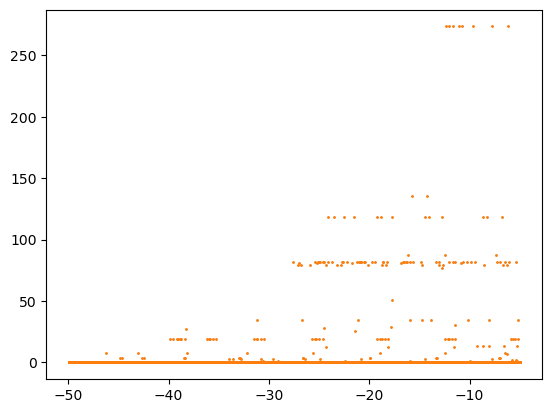

In [13]:
data=X_train_b[X_train_b['sun_elevation:d']< -5]
x=data['sun_elevation:d']
y=data['pv_measurement']
plt.scatter(x, y, s=.1),plt.scatter(x, y, s=1),

In [136]:
X_train_a['direct_rad:W']

2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2023-04-30 19:00:00    0.4
2023-04-30 20:00:00    0.0
2023-04-30 21:00:00    0.0
2023-04-30 22:00:00    0.0
2023-04-30 23:00:00    0.0
Name: direct_rad:W, Length: 34061, dtype: float32

<Axes: xlabel='direct_rad:W', ylabel='Count'>

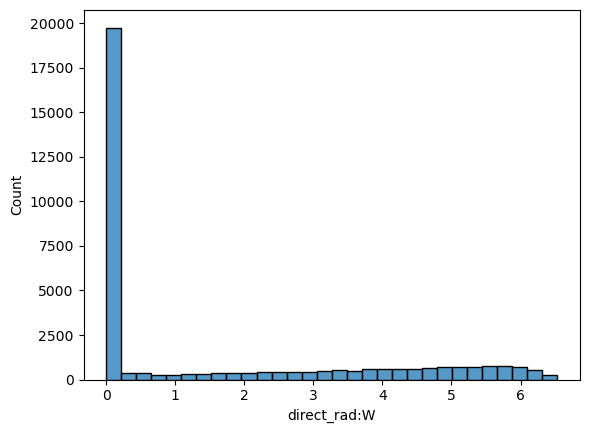

In [132]:
x = np.log(1+X_train_a['direct_rad:W'])
y = X_train_a['pv_measurement']
#plt.hist(x, y, s=.1)
sns.histplot(x)

In [147]:
import numpy as np
from sklearn.preprocessing import power_transform
data = X_train_a[['direct_rad:W','pv_measurement']]+.001
power_transform(data, method='box-cox', standardize=True)

array([[-0.86187853, -1.03291603],
       [-0.86187853, -1.03291603],
       [-0.86187853, -1.03291603],
       ...,
       [-0.86187853, -1.03291603],
       [-0.86187853, -1.03291603],
       [-0.86187853, -1.03291603]])

In [176]:
X_train_a['direct_rad_1h:J']

2019-06-02 22:00:00        0.000000
2019-06-02 23:00:00        0.000000
2019-06-03 00:00:00        0.000000
2019-06-03 01:00:00        0.000000
2019-06-03 02:00:00        0.000000
                           ...     
2023-04-30 19:00:00    32192.599609
2023-04-30 20:00:00      705.400024
2023-04-30 21:00:00        0.000000
2023-04-30 22:00:00        0.000000
2023-04-30 23:00:00        0.000000
Name: direct_rad_1h:J, Length: 34061, dtype: float32

In [205]:
X_train_a.columns.tolist()

['absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'ceiling_height_agl:m',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'cloud_base_agl:m',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad:W',
 'direct_rad_1h:J',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_density:kgm3',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms',
 'pv_measurement']

In [193]:
relevant = ['clear_sky_energy_1h:J', 'clear_sky_rad:W','direct_rad:W', 'diffuse_rad:W', 'direct_rad_1h:J', 'diffuse_rad_1h:J','sun_azimuth:d', 'sun_elevation:d', 'total_cloud_cover:p','dew_point_2m:K', 't_1000hPa:K','wind_speed_10m:ms', 'wind_speed_u_10m:ms', 
 'wind_speed_v_10m:ms','wind_speed_w_1000hPa:ms','relative_humidity_1000hPa:p','msl_pressure:hPa', 'sfc_pressure:hPa',
'precip_5min:mm', 'precip_type_5min:idx','snow_depth:cm', 'snow_water:kgm2','is_day:idx', 'is_in_shadow:idx','pv_measurement']

In [214]:
np.cos(90*np.pi/180)

6.123233995736766e-17

In [213]:
np.cos(np.pi/2)

6.123233995736766e-17

In [199]:
X = X_train_a[relevant]

In [211]:
X_train_observed_a['sun_azimuth_cos:'] = np.cos(X_train_observed_a['sun_azimuth:d']*np.pi/180)

In [200]:
X['ratio'] = X.apply(lambda x: x['direct_rad:W']/(x['direct_rad:W']+x['diffuse_rad:W']), axis=1)

/var/folders/c6/6v_rvxyj6rj6m70q6t5cvn3w0000gn/T/ipykernel_17634/2756113972.py:1: RuntimeWarning: invalid value encountered in scalar divide
  X['ratio'] = X.apply(lambda x: x['direct_rad:W']/(x['direct_rad:W']+x['diffuse_rad:W']), axis=1)
/var/folders/c6/6v_rvxyj6rj6m70q6t5cvn3w0000gn/T/ipykernel_17634/2756113972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ratio'] = X.apply(lambda x: x['direct_rad:W']/(x['direct_rad:W']+x['diffuse_rad:W']), axis=1)


In [203]:
X.corr().pv_measurement.sort_values()

is_in_shadow:idx              -0.576389
relative_humidity_1000hPa:p   -0.365291
wind_speed_v_10m:ms           -0.260477
total_cloud_cover:p           -0.187265
snow_water:kgm2               -0.124654
wind_speed_10m:ms             -0.089403
precip_type_5min:idx          -0.081785
snow_depth:cm                 -0.065209
sun_azimuth:d                 -0.062588
wind_speed_u_10m:ms           -0.059352
precip_5min:mm                -0.057728
wind_speed_w_1000hPa:ms       -0.006044
sfc_pressure:hPa               0.174001
msl_pressure:hPa               0.183326
dew_point_2m:K                 0.245950
t_1000hPa:K                    0.335902
is_day:idx                     0.539552
ratio                          0.666222
sun_elevation:d                0.683479
diffuse_rad_1h:J               0.687206
diffuse_rad:W                  0.702831
clear_sky_energy_1h:J          0.781216
clear_sky_rad:W                0.803538
direct_rad_1h:J                0.830861
direct_rad:W                   0.856095


array([[<Axes: title={'center': 'clear_sky_energy_1h:J'}>,
        <Axes: title={'center': 'clear_sky_rad:W'}>,
        <Axes: title={'center': 'direct_rad:W'}>,
        <Axes: title={'center': 'diffuse_rad:W'}>,
        <Axes: title={'center': 'direct_rad_1h:J'}>],
       [<Axes: title={'center': 'diffuse_rad_1h:J'}>,
        <Axes: title={'center': 'sun_azimuth:d'}>,
        <Axes: title={'center': 'sun_elevation:d'}>,
        <Axes: title={'center': 'total_cloud_cover:p'}>,
        <Axes: title={'center': 'dew_point_2m:K'}>],
       [<Axes: title={'center': 't_1000hPa:K'}>,
        <Axes: title={'center': 'wind_speed_10m:ms'}>,
        <Axes: title={'center': 'wind_speed_u_10m:ms'}>,
        <Axes: title={'center': 'wind_speed_v_10m:ms'}>,
        <Axes: title={'center': 'wind_speed_w_1000hPa:ms'}>],
       [<Axes: title={'center': 'relative_humidity_1000hPa:p'}>,
        <Axes: title={'center': 'msl_pressure:hPa'}>,
        <Axes: title={'center': 'sfc_pressure:hPa'}>,
        <Axe

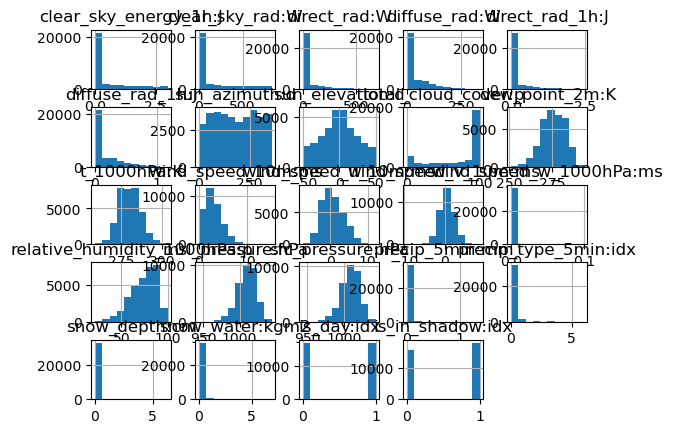

In [161]:
X_train_a[relevant].hist()

In [153]:
X_train_a[['dew_or_rime:idx','sun_elevation:d','wind_speed_u_10m:ms','wind_speed_v_10m:ms']]

,dew_or_rime:idx,sun_elevation:d,wind_speed_u_10m:ms,wind_speed_v_10m:ms
2019-06-02 22:00:00,0.0,-3.202,-3.6,-0.8
2019-06-02 23:00:00,0.0,-4.393,-3.5,0.0
2019-06-03 00:00:00,0.0,-3.910,-3.1,0.7
2019-06-03 01:00:00,0.0,-1.986,-2.7,0.8
2019-06-03 02:00:00,0.0,1.401,-2.5,1.0
...,...,...,...,...
2023-04-30 19:00:00,0.0,1.913,5.1,1.8
2023-04-30 20:00:00,0.0,-3.473,4.2,2.1
2023-04-30 21:00:00,0.0,-7.752,3.7,2.6
2023-04-30 22:00:00,0.0,-10.630,3.4,2.6


In [149]:
power_transform(X_train_a+1, method='box-cox', standardize=True)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

<Axes: xlabel='1', ylabel='Count'>

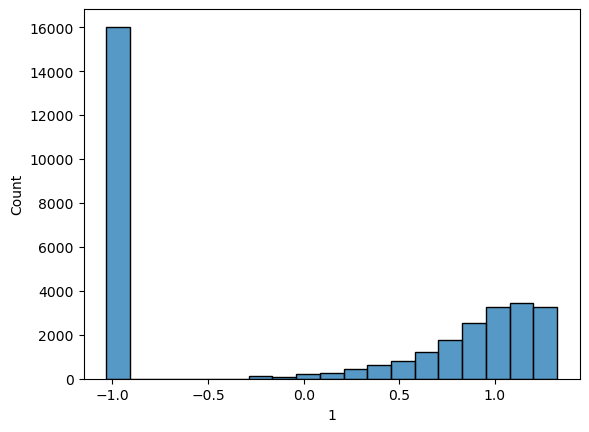

In [142]:
sns.histplot(pd.DataFrame(new)[1])

In [ ]:
sns.histplot(ne)

# Gather the predictions

In [74]:
def postprocessing(X_test_estimated, df_pred, threshold):
    set_ = X_test_estimated[X_test_estimated['sun_elevation:d']<threshold].index.tolist()
    for i in range(len(df_pred)):
        if pd.Timestamp(df_pred.iloc[i].time) in set_:
            df_pred.loc[i, 'prediction'] = 0
    return df_pred

In [90]:
cd ../Marijan

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/Marijan


In [91]:
df_pred_as = pd.read_csv('A_shift.csv')
df_pred_as.set_index('Unnamed: 0', inplace=True)
df_pred_as.index.name = None
df_pred_as

,id,time,prediction,location
0,0,2023-05-01 00:00:00,52.801340,A
1,1,2023-05-01 01:00:00,76.805532,A
2,2,2023-05-01 02:00:00,83.603765,A
3,3,2023-05-01 03:00:00,154.712164,A
4,4,2023-05-01 04:00:00,397.388641,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,271.646303,A
716,716,2023-07-03 20:00:00,114.509199,A
717,717,2023-07-03 21:00:00,56.046811,A
718,718,2023-07-03 22:00:00,56.292328,A


In [92]:
df_pred_a = pd.read_csv('A_stack.csv')
df_pred_a.set_index('Unnamed: 0', inplace=True)
df_pred_a.index.name = None
df_pred_a

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,A
1,1,2023-05-01 01:00:00,0.000000,A
2,2,2023-05-01 02:00:00,0.000000,A
3,3,2023-05-01 03:00:00,70.892358,A
4,4,2023-05-01 04:00:00,277.622729,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,274.787345,A
716,716,2023-07-03 20:00:00,84.167687,A
717,717,2023-07-03 21:00:00,5.676944,A
718,718,2023-07-03 22:00:00,0.000000,A


(<Axes: >, <Axes: >)

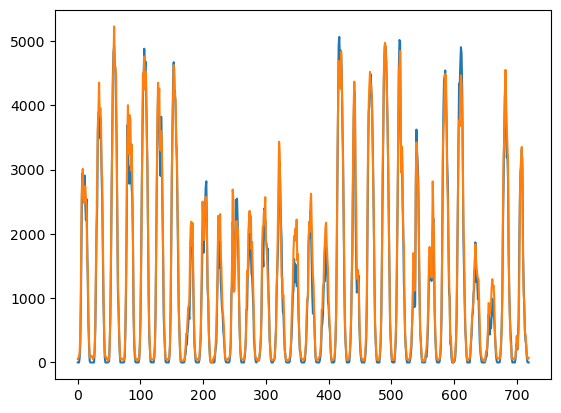

In [93]:
df_pred_a.prediction.plot(), df_pred_as.prediction.plot()

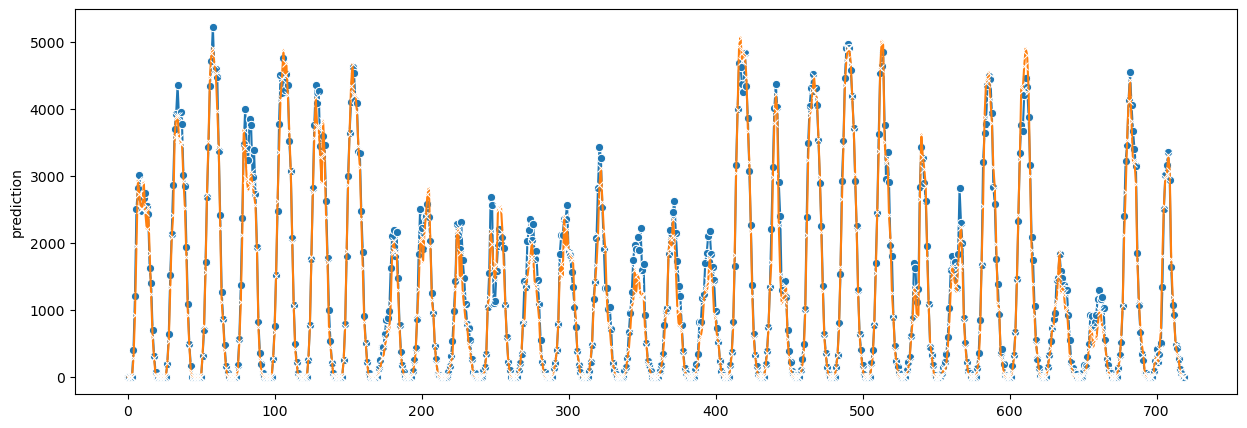

In [103]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.lineplot(postprocessing(X_test_estimated_a, df_pred_as, 0).prediction[:], marker='o')
sns.lineplot(postprocessing(X_test_estimated_a, df_pred_a, 0).prediction[:], marker='x', alpha=1)
#sns.lineplot(df_pred_as.prediction[:], marker='x', alpha=.5)
#plt.ylim(-2, 10)
plt.show()

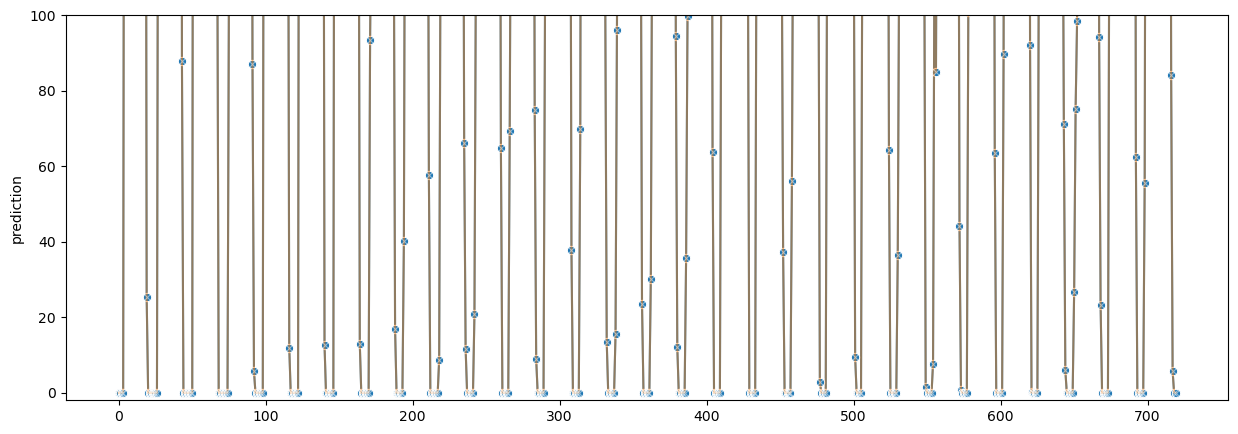

In [104]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.lineplot(postprocessing(X_test_estimated_a, df_pred_a, -5).prediction[:], marker='o')
sns.lineplot(df_pred_a.prediction[:], marker='x', alpha=.5)
plt.ylim(-2, 100)
plt.show()

<Axes: >

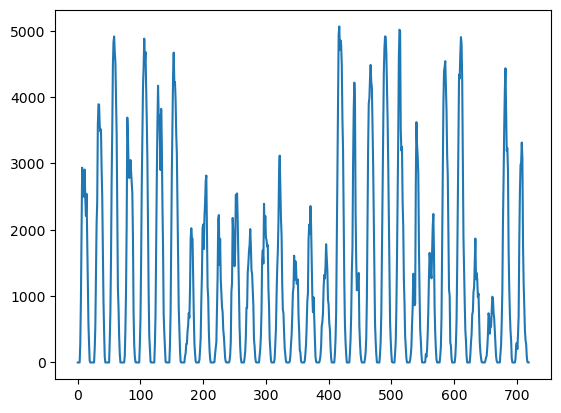

In [105]:
postprocessing(X_test_estimated_a, df_pred_a, -0).prediction.plot()

In [106]:
df_pred_b = pd.read_csv('B_hour.csv')
df_pred_b.set_index('Unnamed: 0', inplace=True)
df_pred_b.index.name = None

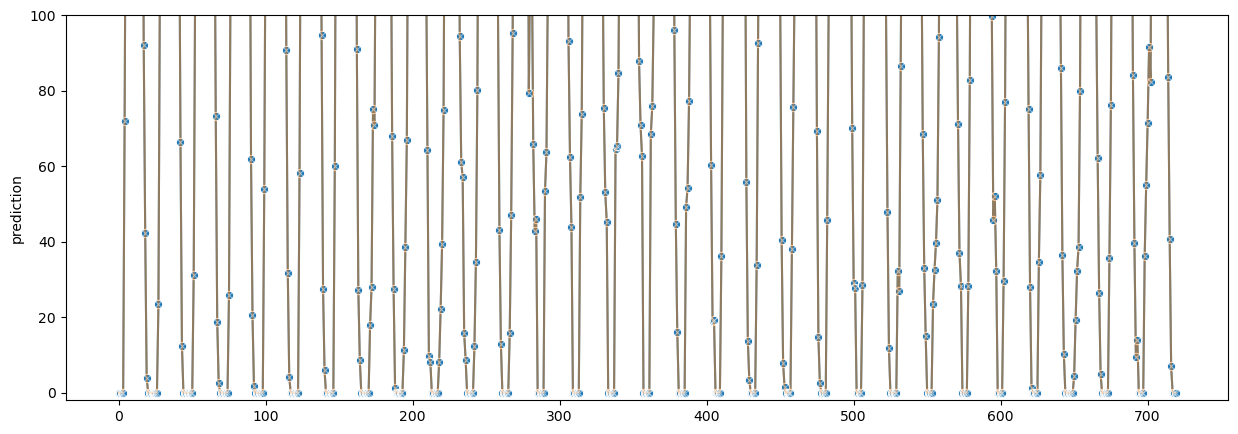

In [107]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.lineplot(postprocessing(X_test_estimated_b, df_pred_b, 0).prediction[:], marker='o')
sns.lineplot(df_pred_b.prediction[:], marker='x', alpha=.5)
plt.ylim(-2, 100)
plt.show()

<Axes: >

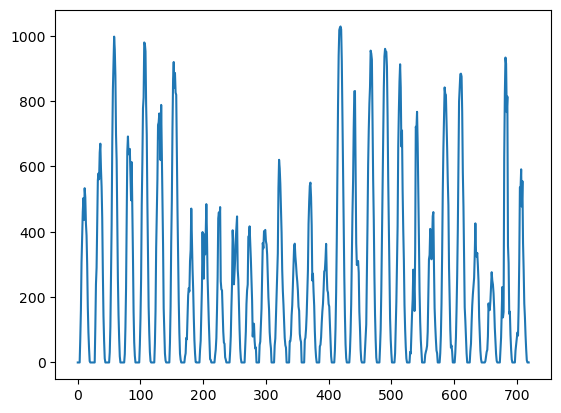

In [108]:
postprocessing(X_test_estimated_b, df_pred_b, 1).prediction.plot()

In [109]:
df_pred_c = pd.read_csv('C_stack.csv')
df_pred_c.set_index('Unnamed: 0', inplace=True)
df_pred_c.index.name = None
df_pred_c

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.184170,C
1,1,2023-05-01 01:00:00,0.522981,C
2,2,2023-05-01 02:00:00,0.850177,C
3,3,2023-05-01 03:00:00,6.502970,C
4,4,2023-05-01 04:00:00,42.524162,C
...,...,...,...,...
715,715,2023-07-03 19:00:00,38.415930,C
716,716,2023-07-03 20:00:00,10.642866,C
717,717,2023-07-03 21:00:00,0.000000,C
718,718,2023-07-03 22:00:00,0.000000,C


<Axes: >

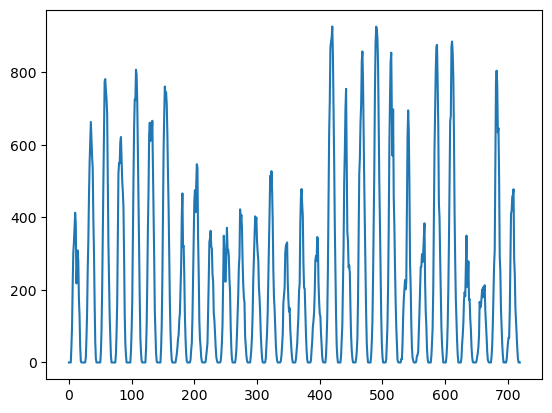

In [110]:
postprocessing(X_test_estimated_c, df_pred_c, -0).prediction.plot()

In [111]:
df_pred_a = postprocessing(X_test_estimated_a, df_pred_as, 0)
df_pred_b = postprocessing(X_test_estimated_b, df_pred_b, 0)
df_pred_c = postprocessing(X_test_estimated_c, df_pred_c, 0)

(<Axes: >,)

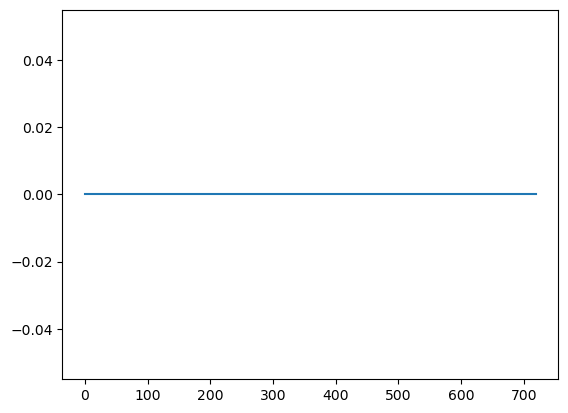

In [113]:
(df_pred_a.prediction-postprocessing(X_test_estimated_a, df_pred_as, 0).prediction).plot(),

In [114]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
#df_pred_total
df_pred_final[0:1000]

,id,prediction
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,397.388641
...,...,...
995,995,369.478621
996,996,316.749507
997,997,253.059493
998,998,188.417337


In [115]:
cd ../submission

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/submission


In [116]:
df_pred_final.to_csv('submission_40.csv', index=False)

In [165]:
t_1,t_2,t_3

(-5, -5, -5)

By observing Residual Analysis https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378 we found out that the noise doesn't follow a centred normal distribution. There is a shift. It may be due to the difference between observed values and estimated ones.